In [1]:
import numpy as np
import pandas as pd
import tabulate
import matplotlib.pyplot as plt
from matplotlib import animation
import pickle, random
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# **Loading data**"

In [2]:
with open('/kaggle/input/aaaaaaaa/train_dataset.pickle', 'rb') as f:
    data = pickle.Unpickler(f).load()

with open('/kaggle/input/aaaaaaaa/test_dataset.pickle', 'rb') as g:
    test = pickle.Unpickler(g).load()

# **Sampling Data**

### **Training Data**

In [3]:
xi_train, yi_train = np.split(data, 2, axis=1)
xi_train = np.array_split(xi_train, 20)
yi_train = np.array_split(yi_train, 20)

### **Testing Data**

In [4]:
xi_test, yi_test = test[:,0], test[:,1]
xi_test = xi_test.reshape(-1, 1)
# print(xi_test)

# **Polynomial Regression**

### **Training and Testing Data**

In [5]:
xi_vec_train = { "degree " + str(i): [PolynomialFeatures(i).fit_transform(x.reshape(-1, 1)) for x in np.array_split(np.concatenate(xi_train), 20)] for i in range(1, 16) }
xi_vec_test = { "degree " + str(i): PolynomialFeatures(i).fit_transform(np.concatenate(xi_test).reshape(-1, 1)) for i in range(1, 16) }

# **Training the Model**

In [6]:
Models = { "degree " + str(i): [LinearRegression().fit(xi_vec_train["degree " + str(i)][j], yi_train[j]) for j in range(20)] for i in range(1, 16) }

# **Prediction**

In [7]:
f_cap_x = { "degree " + str(i): np.array([Models["degree " + str(i)][j].predict(xi_vec_test["degree " + str(i)]) for j in range(20)]) for i in range(1, 16) }

# **Variance**

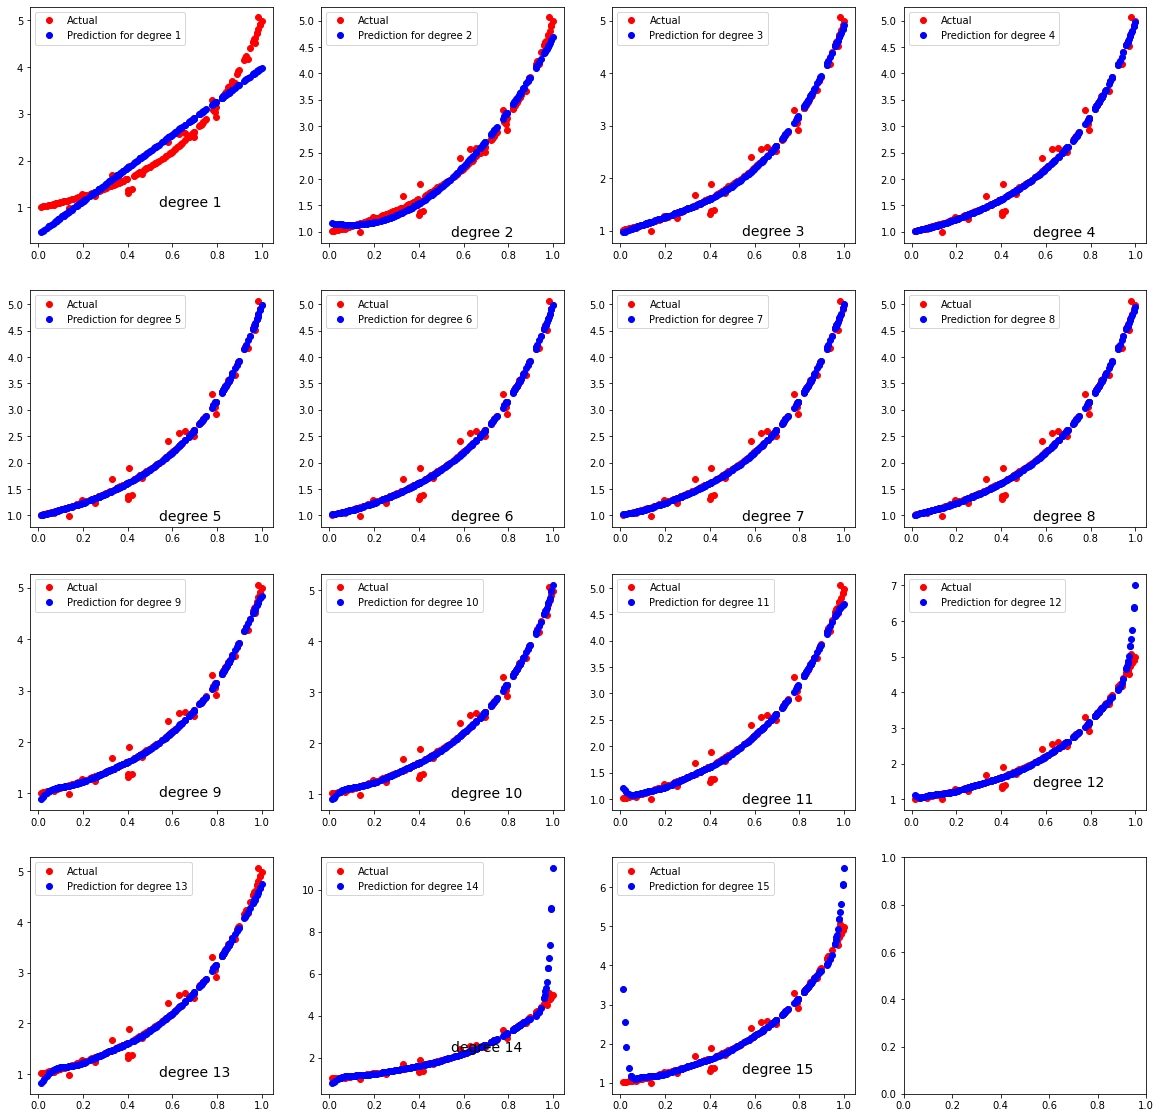

In [8]:
variance = np.zeros(15)
avg_f_cap_x = {}

for idx, degree in enumerate(f_cap_x):
    data = np.array(f_cap_x[degree])
    variance[idx] = np.mean(np.var(data, axis=0))
    avg_f_cap_x[degree] = np.mean(data, axis=0)

fig, axs = plt.subplots(4, 4, figsize=(20,20))
axs = axs.flatten()

for i, degree in enumerate(avg_f_cap_x):
    axs[i].plot(xi_test, yi_test, "o", color="red", label="Actual")
    axs[i].plot(xi_test, avg_f_cap_x[degree], "o", color="blue", label="Prediction for " + degree)
    
    axs[i].legend()

    axs[i].text((axs[i].get_xlim()[1] - axs[i].get_xlim()[0]) / 2, 
            (axs[i].get_ylim()[1] - axs[i].get_ylim()[0]) / 4, 
            degree, 
            horizontalalignment='left', 
            verticalalignment='top', 
            fontsize=14)

plt.show()

## **Bias**

[1.20798073 1.19080905 1.18750632 1.18920491 1.1892516  1.18934158
 1.19054864 1.18853122 1.1858014  1.19111083 1.17672826 1.23037817
 1.17720373 1.31202757 1.21203354]


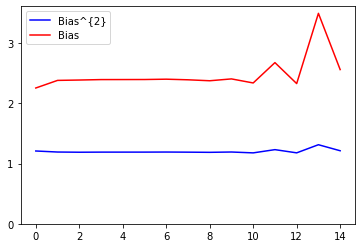

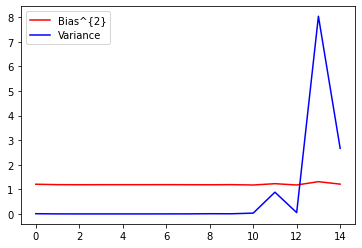

In [9]:
Bias_2 = np.zeros(15)
Bias = np.zeros(15)

for idx, degree in enumerate(f_cap_x):
    data = np.array(f_cap_x[degree])
    Bias[idx] = np.mean(abs(np.mean(data, axis = 0) - yi_test))
    Bias_2[idx] = np.mean((np.mean(data, axis = 0) - yi_test) ** 2)
    
print(Bias)
plt.plot(Bias,color="blue",label="Bias^{2}")
plt.plot(Bias_2,color="red",label="Bias")
plt.yticks(range(0,4))
plt.legend()
plt.show()


plt.plot(Bias,color="red",label="Bias^{2}")
plt.plot(variance,color="blue",label="Variance")
# plt.yticks(range(0,4))
plt.legend()
plt.show()

## **Tabulating Bias and Variance**

In [10]:
table = pd.DataFrame({
    "degree": range(1, 16),
    "bias": Bias,
    "variance": variance
})
print(table)

    degree      bias  variance
0        1  1.207981  0.008681
1        2  1.190809  0.001224
2        3  1.187506  0.000337
3        4  1.189205  0.000367
4        5  1.189252  0.000462
5        6  1.189342  0.000582
6        7  1.190549  0.000917
7        8  1.188531  0.001761
8        9  1.185801  0.008277
9       10  1.191111  0.006501
10      11  1.176728  0.032693
11      12  1.230378  0.884494
12      13  1.177204  0.054317
13      14  1.312028  8.043342
14      15  1.212034  2.669505



## **Irreducible Error**

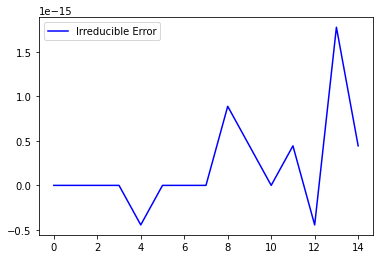

    degree  Irreducible Error
0        1       0.000000e+00
1        2       0.000000e+00
2        3       0.000000e+00
3        4       0.000000e+00
4        5      -4.440892e-16
5        6       0.000000e+00
6        7       0.000000e+00
7        8       0.000000e+00
8        9       8.881784e-16
9       10       4.440892e-16
10      11       0.000000e+00
11      12       4.440892e-16
12      13      -4.440892e-16
13      14       1.776357e-15
14      15       4.440892e-16


In [11]:
mse = np.zeros(15)
for idx, degree in enumerate(f_cap_x):
    data = np.array(f_cap_x[degree])
    for i in data:
        mse[idx] += np.mean(np.square(i - yi_test))
mse /= 20

ierr = mse -  variance - Bias_2

plt.plot(ierr,color="blue",label="Irreducible Error")
plt.legend()
plt.show()

table_ierr = pd.DataFrame({
    "degree": range(1, 16),
    "Irreducible Error": ierr
})
print(table_ierr)

## **Bias$^{2}$ - Variance Graph**


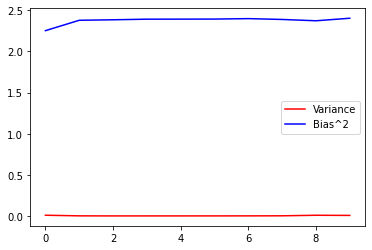

In [12]:
# Plotting til the nth Degreee
n = 10 
plt.plot(variance[:n],color="red",label="Variance")
plt.plot(Bias_2[:n],color="blue",label="Bias^2")
plt.legend()
plt.show()